# Import Data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import csv
import regex as re
from nltk.corpus import stopwords
import nltk
#nltk.download('stopwords')
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [42]:
PATH1 = "D:\\Data\\DataSet_Misinfo_TRUE.csv"
# PATH1 = "/kaggle/input/fake-and-true-news/DataSet_Misinfo_TRUE.csv"
df_true = pd.read_table(PATH1, sep = ',')
df_true['target'] = 1
df_true

,Unnamed: 0,text,target
0,0,The head of a conservative Republican faction ...,1
1,1,Transgender people will be allowed for the fir...,1
2,2,The special counsel investigation of links bet...,1
3,3,Trump campaign adviser George Papadopoulos tol...,1
4,4,President Donald Trump called on the U.S. Post...,1
...,...,...,...
34970,34970,Most conservatives who oppose marriage equalit...,1
34971,34971,The freshman senator from Georgia quoted scrip...,1
34972,34972,The State Department told the Republican Natio...,1
34973,34973,"ADDIS ABABA, Ethiopia —President Obama convene...",1


In [43]:
PATH2 = "D:\\Data\\DataSet_Misinfo_FAKE.csv"
df_fake = pd.read_csv(PATH2)
df_fake['target'] = 0
df_fake

,Unnamed: 0,text,target
0,0,Donald Trump just couldn t wish all Americans ...,0
1,1,House Intelligence Committee Chairman Devin Nu...,0
2,2,"On Friday, it was revealed that former Milwauk...",0
3,3,"On Christmas day, Donald Trump announced that ...",0
4,4,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
43637,44422,The USA wants to divide Syria.\r\n\r\nGreat Br...,0
43638,44423,The Ukrainian coup d'etat cost the US nothing ...,0
43639,44424,The European Parliament falsifies history by d...,0
43640,44425,The European Parliament falsifies history by d...,0


In [44]:
df = pd.concat([df_true, df_fake], ignore_index=True)
df

,Unnamed: 0,text,target
0,0,The head of a conservative Republican faction ...,1
1,1,Transgender people will be allowed for the fir...,1
2,2,The special counsel investigation of links bet...,1
3,3,Trump campaign adviser George Papadopoulos tol...,1
4,4,President Donald Trump called on the U.S. Post...,1
...,...,...,...
78612,44422,The USA wants to divide Syria.\r\n\r\nGreat Br...,0
78613,44423,The Ukrainian coup d'etat cost the US nothing ...,0
78614,44424,The European Parliament falsifies history by d...,0
78615,44425,The European Parliament falsifies history by d...,0


# Exploratory Data Analysis

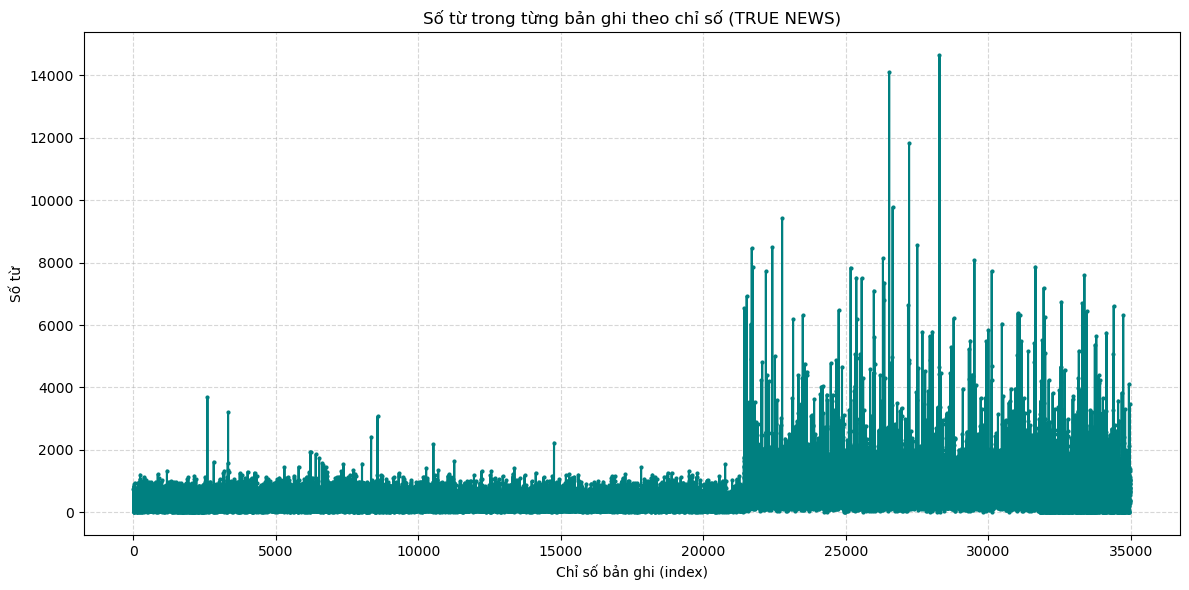

In [67]:
word_counts = df_true['text'].astype(str).apply(lambda x: len(x.split()))

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(word_counts.index, word_counts.values, marker='o', linestyle='-', markersize=2, color='teal')
plt.xlabel('Chỉ số bản ghi (index)')
plt.ylabel('Số từ')
plt.title('Số từ trong từng bản ghi theo chỉ số (TRUE NEWS)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

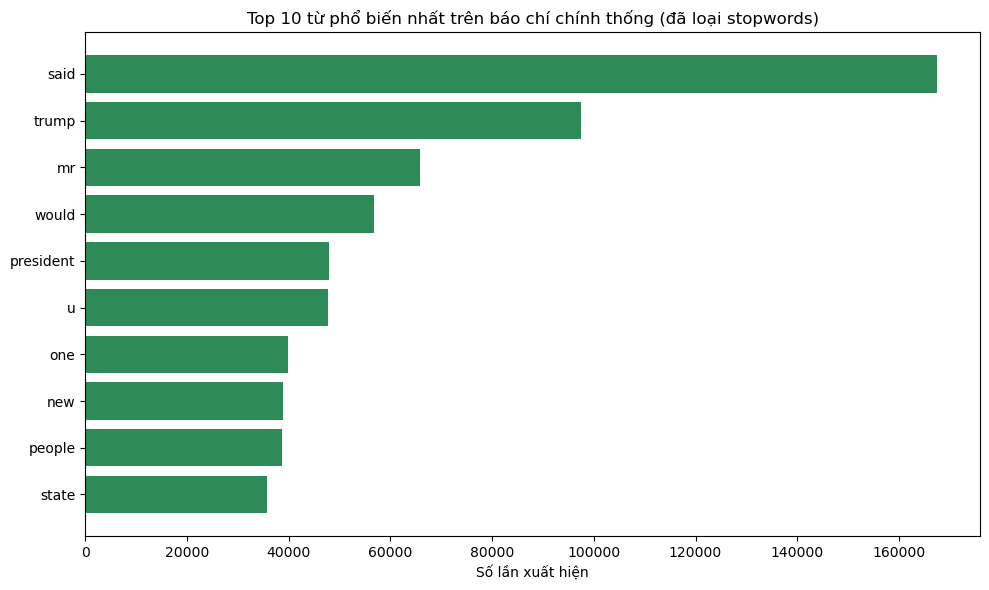

In [70]:
# Lấy danh sách stopwords tiếng Anh
stop_words = set(stopwords.words('english'))

# Gộp toàn bộ văn bản thành một chuỗi
all_text = ' '.join(df_true['text'].astype(str)).lower()

# Tách từ bằng regex
words = re.findall(r'\b\w+\b', all_text)

# Lọc bỏ stopwords
filtered_words = [word for word in words if word not in stop_words]

# Đếm tần suất từ
word_counts = Counter(filtered_words)

# Lấy top 10 từ phổ biến nhất
top_10 = word_counts.most_common(10)
words_top, counts_top = zip(*top_10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(words_top[::-1], counts_top[::-1], color='seagreen')
plt.xlabel('Số lần xuất hiện')
plt.title('Top 10 từ phổ biến nhất trên báo chí chính thống (đã loại stopwords)')
plt.tight_layout()
plt.show()


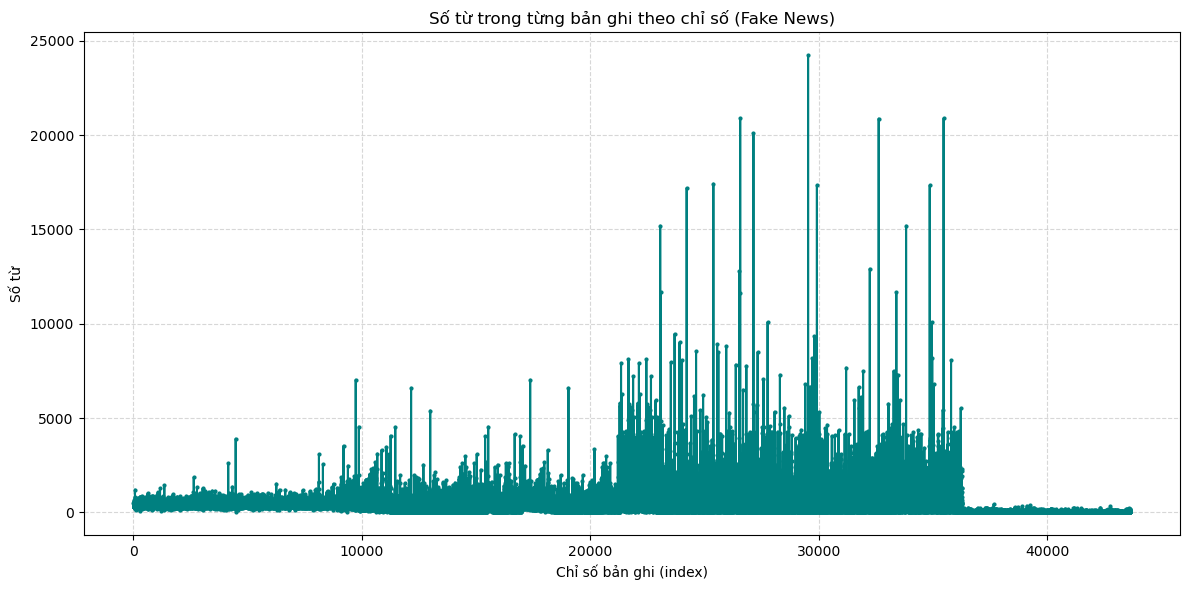

In [69]:
word_counts = df_fake['text'].astype(str).apply(lambda x: len(x.split()))

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(word_counts.index, word_counts.values, marker='o', linestyle='-', markersize=2, color='teal')
plt.xlabel('Chỉ số bản ghi (index)')
plt.ylabel('Số từ')
plt.title('Số từ trong từng bản ghi theo chỉ số (Fake News)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

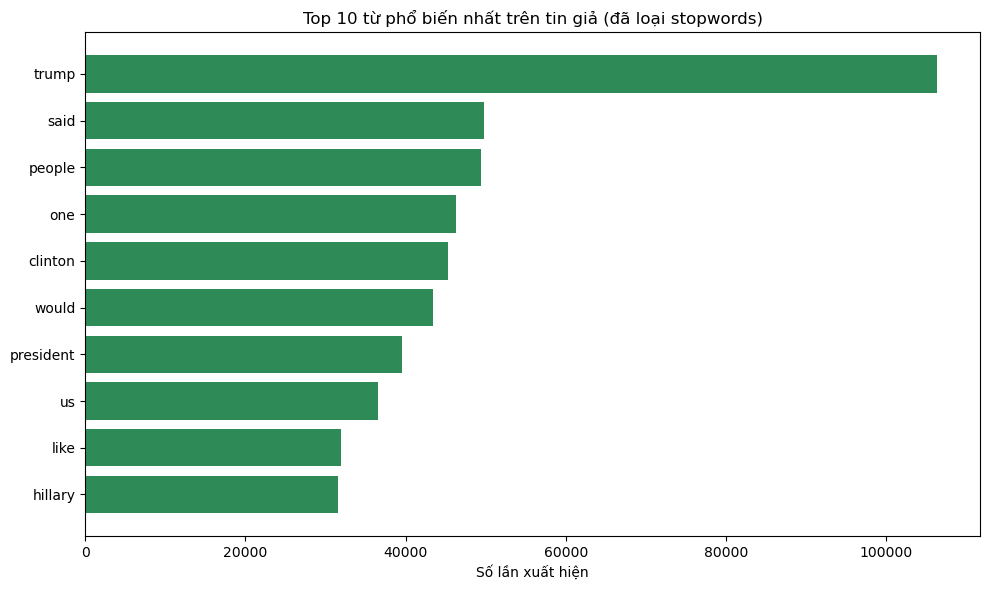

In [71]:
# Lấy danh sách stopwords tiếng Anh
stop_words = set(stopwords.words('english'))

# Gộp toàn bộ văn bản thành một chuỗi
all_text = ' '.join(df_fake['text'].astype(str)).lower()

# Tách từ bằng regex
words = re.findall(r'\b\w+\b', all_text)

# Lọc bỏ stopwords
filtered_words = [word for word in words if word not in stop_words]

# Đếm tần suất từ
word_counts = Counter(filtered_words)

# Lấy top 10 từ phổ biến nhất
top_10 = word_counts.most_common(10)
words_top, counts_top = zip(*top_10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(words_top[::-1], counts_top[::-1], color='seagreen')
plt.xlabel('Số lần xuất hiện')
plt.title('Top 10 từ phổ biến nhất trên tin giả (đã loại stopwords)')
plt.tight_layout()
plt.show()


In [46]:
df.isnull().sum()

Unnamed: 0     0
text          29
target         0
dtype: int64

In [47]:
df['text'].duplicated().sum()

10012

# Data Preprocessing

In [48]:
def clean_text(text):
    if not isinstance(text, str):
        return text
    # Xoá \n, \t và thay thế nhiều khoảng trắng bằng 1 khoảng trắng
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # xóa URL
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # xóa ký tự đặc biệt
    text = re.sub(r'[\n\t\r]', ' ', text)            # thay \n, \t bằng khoảng trắng
    text = re.sub(r'\s+', ' ', text)               # gom nhiều khoảng trắng thành 1
    return text.strip()                            # xoá khoảng trắng ở đầu/cuối

In [49]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df.dropna(inplace = True)
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis = 1, inplace = True)

    df['text'] = df['text'].apply(clean_text)
    df.drop_duplicates(subset=['text'], keep='first', inplace=True)

    return df

In [50]:
df2 = preprocessing_data(df.copy())
df2

,text,target
0,the head of a conservative republican faction ...,1
1,transgender people will be allowed for the fir...,1
2,the special counsel investigation of links bet...,1
3,trump campaign adviser george papadopoulos tol...,1
4,president donald trump called on the us postal...,1
...,...,...
78611,apparently the new kyiv government is in a hur...,0
78612,the usa wants to divide syria great britain fr...,0
78613,the ukrainian coup detat cost the us nothing o...,0
78614,the european parliament falsifies history by d...,0


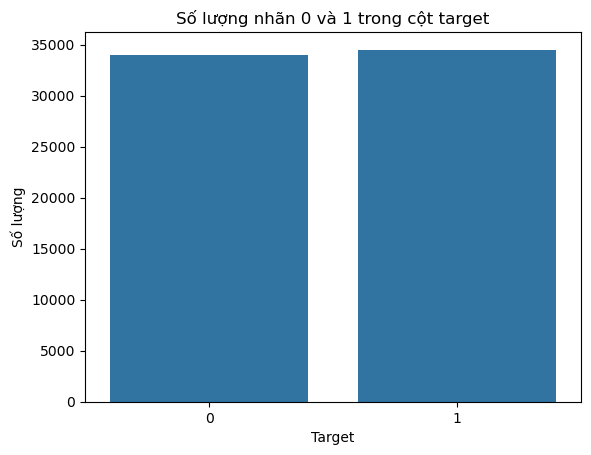

In [51]:
sns.countplot(data=df2, x='target')
plt.title('Số lượng nhãn 0 và 1 trong cột target')
plt.xlabel('Target')
plt.ylabel('Số lượng')
plt.show()

Từ xuất hiện nhiều nhất (sau khi loại stopwords): 'said' (201787 lần)


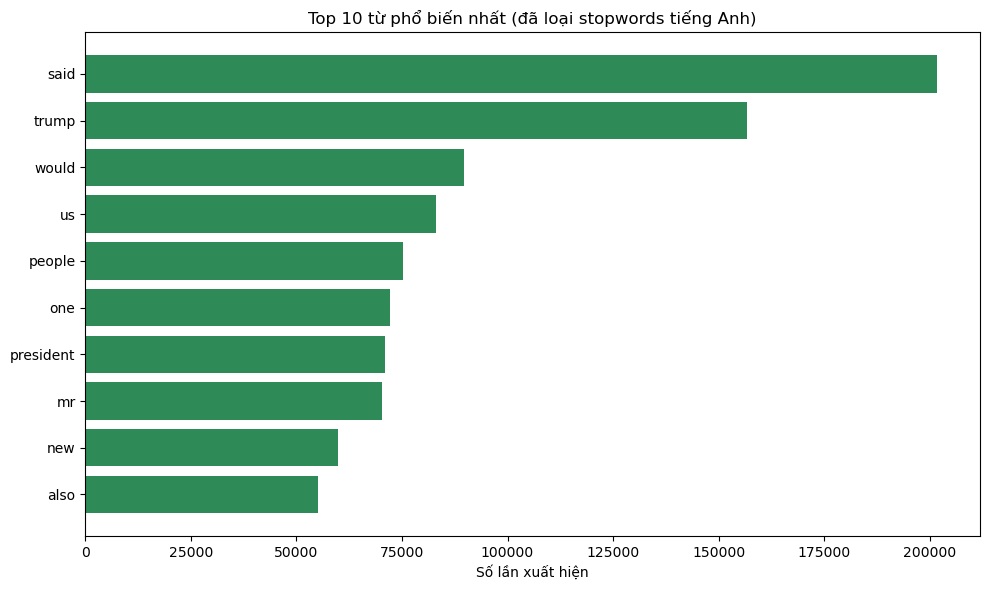

In [59]:
# Lấy danh sách stopwords tiếng Anh
stop_words = set(stopwords.words('english'))

# Gộp toàn bộ văn bản thành một chuỗi
all_text = ' '.join(df2['text'].astype(str)).lower()

# Tách từ bằng regex
words = re.findall(r'\b\w+\b', all_text)

# Lọc bỏ stopwords
filtered_words = [word for word in words if word not in stop_words]

# Đếm tần suất từ
word_counts = Counter(filtered_words)

# Lấy top 10 từ phổ biến nhất
top_10 = word_counts.most_common(10)
words_top, counts_top = zip(*top_10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(words_top[::-1], counts_top[::-1], color='seagreen')
plt.xlabel('Số lần xuất hiện')
plt.title('Top 10 từ phổ biến nhất (đã loại stopwords)')
plt.tight_layout()
plt.show()


In [13]:
print(df2['text'][0])

the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in 2018 in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that support education scientific research infrastructure public hea

# Model Building

## Prepare X and y

In [28]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    if 'target' in df.columns:
        X = df.drop('target', axis = 1)
        y = df['target']
    return X, y

X, y = prepare_X_y(df2)

## Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2025
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)
# trainX = trainX.reset_index(drop=True)
# trainY = trainY.reset_index(drop=True)

In [30]:
print("Train X size:",trainX.shape)
print("Test X size :",testX.shape)

Train X size: (54799, 1)
Test X size : (13700, 1)


In [31]:
trainX['text'][0]

'the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in 2018 in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that support education scientific research infrastructure public he

In [32]:
trainY[0]

1

In [34]:
testX[:1]

,text
23318,representative doug lamborn r co has introduce...


In [35]:
testY[:1]

23318    1
Name: target, dtype: int64

## Traditional Machine Learning Model

### Vectorizer

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')

X_train_tfidf = vectorizer.fit_transform(trainX.squeeze())
X_test_tfidf = vectorizer.transform(testX.squeeze())

In [73]:
print(X_train_tfidf.shape)   # Expect: (54799, 5000) hoặc tương tự
print(trainY.shape)         # Expect: (54799,)


(54799, 5000)
(54799,)


### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear']
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='f1', verbose=1)
lr_grid.fit(X_train_tfidf, trainY)

best_lr = lr_grid.best_estimator_
print(">> Logistic Regression best params:", lr_grid.best_params_)
print(">> Best F1 score (LR):", lr_grid.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
>> Logistic Regression best params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
>> Best F1 score (LR): 0.9457208994784455


In [87]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_and_plot(model, X_test, y_test, title="Model"):
    y_pred = model.predict(X_test)
    print(f"\n           === Evaluation: {title} ===")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {title}")
    plt.grid(False)
    plt.show()
    return classification_report(y_test, y_pred, output_dict=True)


           === Evaluation: Logistic Regression ===
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6817
           1       0.95      0.94      0.95      6883

    accuracy                           0.94     13700
   macro avg       0.94      0.94      0.94     13700
weighted avg       0.94      0.94      0.94     13700



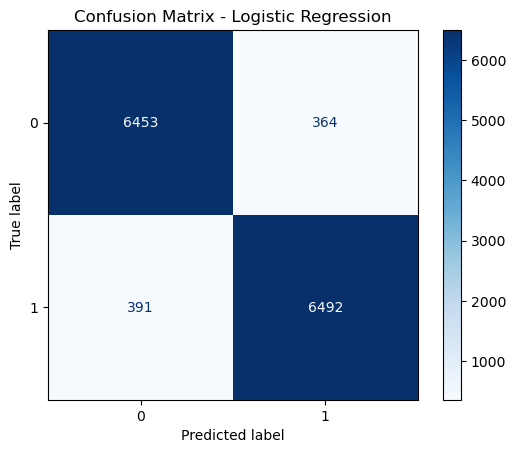

In [88]:
# Đánh giá Logistic Regression
lr_report = evaluate_and_plot(best_lr, X_test_tfidf, testY, "Logistic Regression")


### SVM

In [89]:
from sklearn.svm import LinearSVC

svm_params = {
    'C': [0.01, 0.1, 1, 10, 100, 1000]
}

svm_grid = GridSearchCV(LinearSVC(dual=False, max_iter=1000), svm_params, cv=5, scoring='f1', verbose=1)
svm_grid.fit(X_train_tfidf, trainY)

best_svm = svm_grid.best_estimator_
print(">> SVM best params:", svm_grid.best_params_)
print(">> Best F1 score (SVM):", svm_grid.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
>> SVM best params: {'C': 1}
>> Best F1 score (SVM): 0.9452374009234902



           === Evaluation: Linear SVM ===
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6817
           1       0.95      0.94      0.94      6883

    accuracy                           0.94     13700
   macro avg       0.94      0.94      0.94     13700
weighted avg       0.94      0.94      0.94     13700



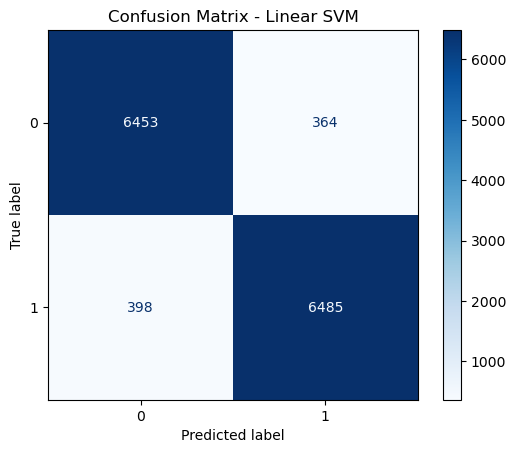

In [90]:
# Đánh giá SVM
svm_report = evaluate_and_plot(best_svm, X_test_tfidf, testY, "Linear SVM")


## Transformer Model

### Bert Model

####  Data Loader and Tokenizer

In [21]:
from transformers import (BertForSequenceClassification, BertTokenizer, AutoTokenizer)
from torch.utils.data import Dataset, DataLoader
import torch
from torch.optim import AdamW
from transformers import get_scheduler
from tqdm import tqdm
import torch.nn as nn
from datasets import load_dataset
from transformers import XLNetTokenizer, XLNetForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [22]:
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case = True)
example = trainX['text'][0]
print('Tokenized:',tokenizer_bert.tokenize(example))

Tokenized: ['the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pi', '##vot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'law', '##makers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'law', '##makers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues', 'such', 'as', 'immigration', 'policy', 'even', 'as', 'the', 'n

In [25]:
print(trainX['text'][0])

if hillary wants to know what new information the fbi has sharyl attkisson knows someone she could ask posted at 434 pm on october 29 2016 by brett t share on facebook share on twitter as twitchy reported hillary clinton held a brief press conference friday to address news that the fbi had found in the process of investigating anthony weiners alleged sexting of a 15yearold girl new emails that warranted further investigation into her own email scandal obviously not pleased by this latest development clinton called on the fbi to release whatever it had hillary clinton we dont know the facts which is why were calling on the fbi to release all the information it has lets get it out new york post nypost october 28 2016 despite that not being how fbi investigations work hillarys call for the fbi to lay its cards on the table inspired sharyl attkisson of full measure news to make a simple suggestion theres no mystery as to whats in the huma abedin emailsto huma she can fill in the hillary ca

In [60]:
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.texts = list(texts)   # Chuyển về list
        self.labels = list(labels)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

class DataLoaderBuilder:
    def __init__(self, tokenizer, max_length=256, batch_size=16, shuffle=True):
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.batch_size = batch_size
        self.shuffle = shuffle

    def get_dataloader(self, texts, labels):
        dataset = TextClassificationDataset(texts, labels, self.tokenizer, self.max_length)
        return DataLoader(dataset, batch_size=self.batch_size, shuffle=self.shuffle)


In [61]:
loader_builder_bert = DataLoaderBuilder(tokenizer_bert, max_length=256, batch_size=16)

# Tạo DataLoader từ text và label
train_loader_bert = loader_builder_bert.get_dataloader(trainX['text'], trainY)
test_loader_bert = loader_builder_bert.get_dataloader(testX['text'], testY)

# Duyệt qua batch
for batch in train_loader_bert:
    print(batch['input_ids'].shape)
    print(batch['labels'])
    break


torch.Size([16, 256])
tensor([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1])


#### Model Building

In [62]:
bert_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 2
)
bert_model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

#### Hyperparameters

In [63]:
max_length = 256
lr = 2e-5
epochs = 3

#### Model Training

In [64]:
class Trainer:
    def __init__(self, model, train_loader, test_loader=None, tokenizer=None, max_length=256, lr=2e-5, epochs=3, device='cuda' if torch.cuda.is_available() else 'cpu'):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.epochs = epochs
        self.device = device

        self.criterion = nn.CrossEntropyLoss()  # Sử dụng CrossEntropyLoss
        self.optimizer = AdamW(self.model.parameters(), lr=lr)
        self.scheduler = get_scheduler(
            "linear",
            optimizer=self.optimizer,
            num_warmup_steps=0,
            num_training_steps=len(train_loader) * epochs
        )

    def train(self):
        self.model.train()
        for epoch in range(self.epochs):
            total_loss = 0
            progress_bar = tqdm(self.train_loader, desc=f"Epoch {epoch+1}/{self.epochs}")
            for batch in progress_bar:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].long().to(self.device)

                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs.logits

                loss = self.criterion(logits, labels)

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                self.scheduler.step()

                total_loss += loss.item()
                progress_bar.set_postfix(loss=loss.item())

            avg_loss = total_loss / len(self.train_loader)
            print(f"Epoch {epoch+1}: Train Loss = {avg_loss:.4f}")

            # Lưu model và tokenizer
            save_path = f"bert_saved/epoch_{epoch+1}"
            self.model.save_pretrained(save_path)
            self.tokenizer.save_pretrained(save_path)
            print(f"Saved model to {save_path}")

            if self.test_loader:
                self.evaluate()

    def evaluate(self):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch in self.test_loader:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].long().to(self.device)

                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs.logits

                loss = self.criterion(logits, labels)
                total_loss += loss.item()

                preds = torch.argmax(logits, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        acc = correct / total
        avg_loss = total_loss / len(self.test_loader)
        print(f"Test Loss = {avg_loss:.4f}, Accuracy = {acc:.4f}")
        self.model.train()

    def predict(self, texts):
        self.model.eval()
        # Create a simple dataset and dataloader for prediction
        class PredictionDataset(Dataset):
            def __init__(self, texts, tokenizer, max_length):
                self.texts = texts
                self.tokenizer = tokenizer
                self.max_length = max_length

            def __len__(self):
                return len(self.texts)

            def __getitem__(self, idx):
                encoding = self.tokenizer(
                    self.texts[idx],
                    truncation=True,
                    padding='max_length',
                    max_length=self.max_length,
                    return_tensors='pt'
                )
                return {
                    'input_ids': encoding['input_ids'].squeeze(0),
                    'attention_mask': encoding['attention_mask'].squeeze(0),
                }

        prediction_dataset = PredictionDataset(texts, self.tokenizer, self.max_length)
        prediction_loader = DataLoader(prediction_dataset, batch_size=self.train_loader.batch_size, shuffle=False) # Use the same batch size as training

        all_preds = []
        with torch.no_grad():
            for batch in tqdm(prediction_loader, desc="Predicting"):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)

                outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs.logits

                if self.model.config.num_labels == 1:
                    probs = torch.sigmoid(logits).squeeze()
                    preds = (probs > 0.5).long()
                else:
                    preds = torch.argmax(logits, dim=1)
                all_preds.extend(preds.cpu().numpy())

        return all_preds

In [26]:
trainer_bert = Trainer(
    model=bert_model,
    train_loader=train_loader_bert,
    test_loader=test_loader_bert,
    tokenizer = tokenizer_bert,
    max_length = max_length,
    lr= lr,
    epochs= epochs
)

trainer_bert.train()

Epoch 1/3: 100%|██████████| 3425/3425 [48:22<00:00,  1.18it/s, loss=0.00635] 


Epoch 1: Train Loss = 0.0832
Saved model to bert_saved/epoch_1
Test Loss = 0.0516, Accuracy = 0.9830


Epoch 2/3: 100%|██████████| 3425/3425 [48:29<00:00,  1.18it/s, loss=0.00182] 


Epoch 2: Train Loss = 0.0230
Saved model to bert_saved/epoch_2
Test Loss = 0.0371, Accuracy = 0.9869


Epoch 3/3: 100%|██████████| 3425/3425 [48:31<00:00,  1.18it/s, loss=0.00144] 


Epoch 3: Train Loss = 0.0047
Saved model to bert_saved/epoch_3
Test Loss = 0.0482, Accuracy = 0.9877


#### Performance Evaluation

In [30]:
preds_bert = trainer_bert.predict(testX['text'].tolist())

print(">> Confusion matrix: \n", confusion_matrix(testY.tolist() , preds_bert))
print(">> Classification report: \n", classification_report(testY.tolist() , preds_bert))

Predicting: 100%|██████████| 857/857 [04:45<00:00,  3.00it/s]

>> Confusion matrix: 
 [[6740   77]
 [  91 6792]]
>> Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6817
           1       0.99      0.99      0.99      6883

    accuracy                           0.99     13700
   macro avg       0.99      0.99      0.99     13700
weighted avg       0.99      0.99      0.99     13700



In [31]:
texts_to_predict = [
    # Fake News
    "U.S. Senator Ted Cruz wants to place a cap of 10 cents each on renewable fuel credits"
    "Trump is the president of U.S."
    "Elon Musk says he will build the first city on Mars by the end of next year.",
    "Drinking salt water daily has been proven to make you immune to all diseases.",
    "The Eiffel Tower is being moved to Germany for restoration purposes.",
    "A secret civilization has been discovered living beneath Antarctica.",

    # Real News
    "The European Union has officially banned single-use plastics, aiming to reduce ocean pollution.",
    "Japan has launched a new satellite to monitor climate change impacts in the Pacific region.",
    "The FDA has approved a groundbreaking gene therapy for a rare blood disorder.",
    "The global unemployment rate dropped by 0.3% in the first quarter of the year, reports the ILO.",
    "Google announced a major investment in renewable energy projects across North America.",
]



In [32]:
predictions = trainer_bert.predict(texts_to_predict)

for text, pred in zip(texts_to_predict, predictions):
    label = "Real" if pred == 1 else "Fake"
    print(f"[{label}] {text}")


Predicting: 100%|██████████| 1/1 [00:00<00:00,  7.49it/s]

[Fake] U.S. Senator Ted Cruz wants to place a cap of 10 cents each on renewable fuel creditsTrump is the president of U.S.Elon Musk says he will build the first city on Mars by the end of next year.
[Fake] Drinking salt water daily has been proven to make you immune to all diseases.
[Fake] The Eiffel Tower is being moved to Germany for restoration purposes.
[Fake] A secret civilization has been discovered living beneath Antarctica.
[Fake] The European Union has officially banned single-use plastics, aiming to reduce ocean pollution.
[Real] Japan has launched a new satellite to monitor climate change impacts in the Pacific region.
[Fake] The FDA has approved a groundbreaking gene therapy for a rare blood disorder.
[Fake] The global unemployment rate dropped by 0.3% in the first quarter of the year, reports the ILO.
[Real] Google announced a major investment in renewable energy projects across North America.


## XLNet

### Tokenizer

In [22]:
tokenizer_xln = XLNetTokenizer.from_pretrained("xlnet-base-cased")

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [23]:
example = trainX['text'][0]
print('Tokenized:',tokenizer_xln.tokenize(example))

Tokenized: ['▁if', '▁hill', 'ary', '▁wants', '▁to', '▁know', '▁what', '▁new', '▁information', '▁the', '▁f', 'bi', '▁has', '▁', 's', 'har', 'yl', '▁at', 't', 'ki', 'sson', '▁knows', '▁someone', '▁she', '▁could', '▁ask', '▁posted', '▁at', '▁4', '34', '▁pm', '▁on', '▁', 'oc', 'to', 'ber', '▁29', '▁2016', '▁by', '▁', 'br', 'ett', '▁', 't', '▁share', '▁on', '▁face', 'book', '▁share', '▁on', '▁twitter', '▁as', '▁twitch', 'y', '▁reported', '▁hill', 'ary', '▁', 'clin', 'ton', '▁held', '▁a', '▁brief', '▁press', '▁conference', '▁', 'fri', 'day', '▁to', '▁address', '▁news', '▁that', '▁the', '▁f', 'bi', '▁had', '▁found', '▁in', '▁the', '▁process', '▁of', '▁investigating', '▁an', 'thon', 'y', '▁we', 'in', 'ers', '▁alleged', '▁sex', 'ting', '▁of', '▁a', '▁15', 'year', 'old', '▁girl', '▁new', '▁emails', '▁that', '▁warrant', 'ed', '▁further', '▁investigation', '▁into', '▁her', '▁own', '▁email', '▁scandal', '▁obviously', '▁not', '▁pleased', '▁by', '▁this', '▁latest', '▁development', '▁', 'clin', 'ton',

In [24]:
print(example)

if hillary wants to know what new information the fbi has sharyl attkisson knows someone she could ask posted at 434 pm on october 29 2016 by brett t share on facebook share on twitter as twitchy reported hillary clinton held a brief press conference friday to address news that the fbi had found in the process of investigating anthony weiners alleged sexting of a 15yearold girl new emails that warranted further investigation into her own email scandal obviously not pleased by this latest development clinton called on the fbi to release whatever it had hillary clinton we dont know the facts which is why were calling on the fbi to release all the information it has lets get it out new york post nypost october 28 2016 despite that not being how fbi investigations work hillarys call for the fbi to lay its cards on the table inspired sharyl attkisson of full measure news to make a simple suggestion theres no mystery as to whats in the huma abedin emailsto huma she can fill in the hillary ca

### Data Loader

In [25]:
loader_builder_xln = DataLoaderBuilder(tokenizer_xln, max_length = 256, batch_size=16)

# Tạo DataLoader từ text và label
train_loader_xln = loader_builder_xln.get_dataloader(trainX['text'], trainY)
test_loader_xln = loader_builder_xln.get_dataloader(testX['text'], testY)

# Duyệt qua batch
for batch in train_loader_xln:
    print(batch['input_ids'].shape)
    print(batch['labels'])
    break


torch.Size([16, 256])
tensor([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0])


### Model Building

In [26]:
xln_model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=2)
xln_model

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0-11): 12 x XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (sequence_summary): SequenceSummary(
    (summary): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
    (first_dropout): Identity()
    (last

### Hyperparameters

In [27]:
max_length = 256
lr = 2e-5
epochs = 3

### Model Training

In [ ]:
trainer_xln = Trainer(
    model=xln_model,
    train_loader=train_loader_xln,
    test_loader=test_loader_xln,
    tokenizer = tokenizer_xln,
    max_length = max_length,
    lr= lr,
    epochs= epochs
)

trainer_xln.train()


Epoch 1/3: 100%|██████████| 3425/3425 [1:15:54<00:00,  1.33s/it, loss=0.00133]


Epoch 1: Train Loss = 0.0923
Saved model to bert_saved/epoch_1
Test Loss = 0.0447, Accuracy = 0.9856


Epoch 2/3:  87%|████████▋ | 2995/3425 [1:06:23<09:30,  1.33s/it, loss=0.00123] 

Test Loss = 0.0554, Accuracy = 0.9839


Epoch 3/3:  94%|█████████▍| 3233/3425 [1:11:37<04:14,  1.32s/it, loss=0.00583] 

### Performance Evaluation

In [34]:
preds_xln = trainer_xln.predict(testX['text'].reset_index(drop=True))

print(">> Confusion matrix: \n", confusion_matrix(testY.tolist() , preds_xln))
print(">> Classification report: \n", classification_report(testY.tolist() , preds_xln))

Predicting: 100%|██████████| 857/857 [08:48<00:00,  1.62it/s]

>> Confusion matrix: 
 [[6735   82]
 [  91 6792]]
>> Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6817
           1       0.99      0.99      0.99      6883

    accuracy                           0.99     13700
   macro avg       0.99      0.99      0.99     13700
weighted avg       0.99      0.99      0.99     13700



In [35]:
texts_to_predict = [
    # Fake News
    "U.S. Senator Ted Cruz wants to place a cap of 10 cents each on renewable fuel credits",
    "Elon Musk says he will build the first city on Mars by the end of next year.",
    "Drinking salt water daily has been proven to make you immune to all diseases.",
    "The Eiffel Tower is being moved to Germany for restoration purposes.",
    "A secret civilization has been discovered living beneath Antarctica.",

    # Real News
    "Trump is the president of U.S.",
    "The European Union has officially banned single-use plastics, aiming to reduce ocean pollution.",
    "Japan has launched a new satellite to monitor climate change impacts in the Pacific region.",
    "The FDA has approved a groundbreaking gene therapy for a rare blood disorder.",
    "The global unemployment rate dropped by 0.3% in the first quarter of the year, reports the ILO.",
    "Google announced a major investment in renewable energy projects across North America.",
]


In [36]:
predictions = trainer_xln.predict(texts_to_predict)

for text, pred in zip(texts_to_predict, predictions):
    label = "Real" if pred == 1 else "Fake"
    print(f"[{label}] {text}")


Predicting: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

[Real] U.S. Senator Ted Cruz wants to place a cap of 10 cents each on renewable fuel credits
[Fake] Elon Musk says he will build the first city on Mars by the end of next year.
[Fake] Drinking salt water daily has been proven to make you immune to all diseases.
[Fake] The Eiffel Tower is being moved to Germany for restoration purposes.
[Fake] A secret civilization has been discovered living beneath Antarctica.
[Real] Trump is the president of U.S.
[Fake] The European Union has officially banned single-use plastics, aiming to reduce ocean pollution.
[Fake] Japan has launched a new satellite to monitor climate change impacts in the Pacific region.
[Fake] The FDA has approved a groundbreaking gene therapy for a rare blood disorder.
[Fake] The global unemployment rate dropped by 0.3% in the first quarter of the year, reports the ILO.
[Real] Google announced a major investment in renewable energy projects across North America.


In [59]:
texts_to_predict = [
    # Fake News
    "Speaking on CNBC, Paul Ryan was going full throttle, trying to convince us that the paltry savings we re getting is actually wait for it big money",
    "Donald Trump visited his golf club that day, marking the 84th time he has done so since taking office.",
    "Trump tweeted an accusation that McCabe received $700,000 for his wife’s campaign from “Clinton Puppets” during the investigation.",
    "FBI lawyer James Baker was reassigned, according to Fox News.",
    "Following the video’s release, Slager was arrested and charged with murder. Despite an initial mistrial, he was later convicted and sentenced to 19–24 years in prison in December 2017 by U.S. District Judge David Norton.",

    # Real News
    "The Trump administration decided not to appeal rulings from two federal appeals courts that blocked the transgender military ban.",
    "The Department of Defense has announced that it will release an independent study on transgender military service in the coming weeks.",
    "In July, President Trump announced a policy to ban transgender people from serving in the military, reversing President Obama’s previous policy.",
    "Despite voting for a debt-increasing tax overhaul, Representative Mark Meadows urged fiscal conservatism and budget cuts for 2018.",
    "The Democratic contenders are beginning their efforts to unseat Republican congressman Pat Meehan in the upcoming congressional elections."
   
]

In [60]:
predictions = trainer_xln.predict(texts_to_predict)

for text, pred in zip(texts_to_predict, predictions):
    label = "Real" if pred == 1 else "Fake"
    print(f"[{label}] {text}")


Predicting: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

[Fake] Speaking on CNBC, Paul Ryan was going full throttle, trying to convince us that the paltry savings we re getting is actually wait for it big money
[Fake] Donald Trump visited his golf club that day, marking the 84th time he has done so since taking office.
[Fake] Trump tweeted an accusation that McCabe received $700,000 for his wife’s campaign from “Clinton Puppets” during the investigation.
[Fake] FBI lawyer James Baker was reassigned, according to Fox News.
[Fake] Following the video’s release, Slager was arrested and charged with murder. Despite an initial mistrial, he was later convicted and sentenced to 19–24 years in prison in December 2017 by U.S. District Judge David Norton.
[Real] The Trump administration decided not to appeal rulings from two federal appeals courts that blocked the transgender military ban.
[Real] The Department of Defense has announced that it will release an independent study on transgender military service in the coming weeks.
[Real] In July, Presid

In [42]:
save_path = "xlnet_saved"
trainer_xln.model.save_pretrained(save_path)
trainer_xln.tokenizer.save_pretrained(save_path)

('xlnet_saved/tokenizer_config.json',
 'xlnet_saved/special_tokens_map.json',
 'xlnet_saved/spiece.model',
 'xlnet_saved/added_tokens.json')

In [43]:
import shutil
shutil.make_archive("xlnet_saved", 'zip', "xlnet_saved")

'/kaggle/working/xlnet_saved.zip'

## roBerta

In [13]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

# Dùng phiên bản base (có thể đổi sang 'roberta-large' nếu cần)
tokenizer_robert = RobertaTokenizer.from_pretrained("roberta-base")
example = trainX['text'][0]
print('Tokenized:',tokenizer_robert.tokenize(example))

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Tokenized: ['if', 'Ġhill', 'ary', 'Ġwants', 'Ġto', 'Ġknow', 'Ġwhat', 'Ġnew', 'Ġinformation', 'Ġthe', 'Ġf', 'bi', 'Ġhas', 'Ġsh', 'aryl', 'Ġatt', 'k', 'isson', 'Ġknows', 'Ġsomeone', 'Ġshe', 'Ġcould', 'Ġask', 'Ġposted', 'Ġat', 'Ġ4', '34', 'Ġpm', 'Ġon', 'Ġoct', 'ober', 'Ġ29', 'Ġ2016', 'Ġby', 'Ġbre', 'tt', 'Ġt', 'Ġshare', 'Ġon', 'Ġfacebook', 'Ġshare', 'Ġon', 'Ġtwitter', 'Ġas', 'Ġtwitch', 'y', 'Ġreported', 'Ġhill', 'ary', 'Ġcl', 'inton', 'Ġheld', 'Ġa', 'Ġbrief', 'Ġpress', 'Ġconference', 'Ġfr', 'iday', 'Ġto', 'Ġaddress', 'Ġnews', 'Ġthat', 'Ġthe', 'Ġf', 'bi', 'Ġhad', 'Ġfound', 'Ġin', 'Ġthe', 'Ġprocess', 'Ġof', 'Ġinvestigating', 'Ġanth', 'ony', 'Ġwe', 'iners', 'Ġalleged', 'Ġse', 'xt', 'ing', 'Ġof', 'Ġa', 'Ġ15', 'year', 'old', 'Ġgirl', 'Ġnew', 'Ġemails', 'Ġthat', 'Ġwarranted', 'Ġfurther', 'Ġinvestigation', 'Ġinto', 'Ġher', 'Ġown', 'Ġemail', 'Ġscandal', 'Ġobviously', 'Ġnot', 'Ġpleased', 'Ġby', 'Ġthis', 'Ġlatest', 'Ġdevelopment', 'Ġcl', 'inton', 'Ġcalled', 'Ġon', 'Ġthe', 'Ġf', 'bi', 'Ġto', 'Ġrelea

In [14]:
loader_builder_robert = DataLoaderBuilder(tokenizer_robert, max_length=256, batch_size=16)

# Tạo DataLoader từ text và label
train_loader_robert = loader_builder_robert.get_dataloader(trainX['text'], trainY)
test_loader_robert = loader_builder_robert.get_dataloader(testX['text'], testY)

# Duyệt qua batch
for batch in train_loader_robert:
    print(batch['input_ids'].shape)
    print(batch['labels'])
    break


torch.Size([16, 256])
tensor([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])


In [15]:
robert_model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
trainer_robert = Trainer(
    model=robert_model,
    train_loader=train_loader_robert,
    test_loader=test_loader_robert,
    tokenizer = tokenizer_robert,
    max_length = max_length,
    lr= lr,
    epochs= epochs
)

trainer_robert.train()

Epoch 1/3: 100%|██████████| 3425/3425 [44:40<00:00,  1.28it/s, loss=0.00386] 


Epoch 1: Train Loss = 0.0832
Saved model to bert_saved/epoch_1
Test Loss = 0.0437, Accuracy = 0.9847


Epoch 2/3: 100%|██████████| 3425/3425 [44:24<00:00,  1.29it/s, loss=0.0804]  


Epoch 2: Train Loss = 0.0269
Saved model to bert_saved/epoch_2
Test Loss = 0.0342, Accuracy = 0.9890


Epoch 3/3: 100%|██████████| 3425/3425 [44:21<00:00,  1.29it/s, loss=0.00129] 


Epoch 3: Train Loss = 0.0081
Saved model to bert_saved/epoch_3
Test Loss = 0.0406, Accuracy = 0.9899


In [17]:
save_path = "robert_saved"
trainer_robert.model.save_pretrained(save_path)
trainer_robert.tokenizer.save_pretrained(save_path)
import shutil
shutil.make_archive("robert_saved", 'zip', "robert_saved")

'/kaggle/working/robert_saved.zip'

In [18]:
texts_to_predict = [
    # Fake News
    "Speaking on CNBC, Paul Ryan was going full throttle, trying to convince us that the paltry savings we re getting is actually wait for it big money",
    "Donald Trump visited his golf club that day, marking the 84th time he has done so since taking office.",
    "Trump tweeted an accusation that McCabe received $700,000 for his wife’s campaign from “Clinton Puppets” during the investigation.",
    "FBI lawyer James Baker was reassigned, according to Fox News.",
    "Following the video’s release, Slager was arrested and charged with murder. Despite an initial mistrial, he was later convicted and sentenced to 19–24 years in prison in December 2017 by U.S. District Judge David Norton.",

    # Real News
    "The Trump administration decided not to appeal rulings from two federal appeals courts that blocked the transgender military ban.",
    "The Department of Defense has announced that it will release an independent study on transgender military service in the coming weeks.",
    "In July, President Trump announced a policy to ban transgender people from serving in the military, reversing President Obama’s previous policy.",
    "Despite voting for a debt-increasing tax overhaul, Representative Mark Meadows urged fiscal conservatism and budget cuts for 2018.",
    "The Democratic contenders are beginning their efforts to unseat Republican congressman Pat Meehan in the upcoming congressional elections."
   
]

predictions_robert = trainer_robert.predict(texts_to_predict)

for text, pred in zip(texts_to_predict, predictions_robert):
    label = "Real" if pred == 1 else "Fake"
    print(f"[{label}] {text}")


Predicting: 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

[Fake] Speaking on CNBC, Paul Ryan was going full throttle, trying to convince us that the paltry savings we re getting is actually wait for it big money
[Real] Donald Trump visited his golf club that day, marking the 84th time he has done so since taking office.
[Real] Trump tweeted an accusation that McCabe received $700,000 for his wife’s campaign from “Clinton Puppets” during the investigation.
[Real] FBI lawyer James Baker was reassigned, according to Fox News.
[Fake] Following the video’s release, Slager was arrested and charged with murder. Despite an initial mistrial, he was later convicted and sentenced to 19–24 years in prison in December 2017 by U.S. District Judge David Norton.
[Real] The Trump administration decided not to appeal rulings from two federal appeals courts that blocked the transgender military ban.
[Fake] The Department of Defense has announced that it will release an independent study on transgender military service in the coming weeks.
[Real] In July, Presid

## Conclusion

Nhìn chung, các mô hình cho dù là truyền thống hay các mô hình có khả năng học sâu đều có thể huấn luyên và dự đoán tốt cho bộ dữ liệu, góp phần giúp con người có thể nhận biết và phòng chống nạn tin giả được tốt hơn. Các mô hình như BERT, XLNet hay roBERTa đều có thể hoạt động gần như tuyệt đối trên bộ dữ liệu đã cho, đặc biệt đối với ngôn ngữ tiếng Anh do đây là các mô hình đã được huấn luyện trước trên tập dữ liệu tiếng Anh.

Tuy nhiên vẫn còn một số khó khăn và thách thức:
     
-	Tốn kém về thời gian, bộ nhớ cũng như tài nguyên sử dụng: Nhờ các nền tảng học thuật như Colab, Kaggle,... cung cấp môi trường sử dụng GPU để có thể huấn luyện mô hình, tuy nhiên vẫn có giới hạn thời gian. Nếu không, phải mất nhiều chi phí để phục vụ cho việc nghiên cứu.

-	Bộ dữ liệu dùng để huấn luyện có thể đã cũ, nên khi thử dùng mô hình để dự đoán cho những thông tin thực tế bất kỳ, đôi khi mô hình lại hoạt động chưa chính xác do các thông tin cũ có thể đã sai hoặc không còn nữa.

-	Tập dữ liệu chỉ gói gọn trong một vài lĩnh vực nhất định (Chính trị, Kinh tế, Tin tức,...) hoặc chỉ do một tờ báo biên soạn có thể dẫn đến việc văn phong giống nhau.

-	Tập dữ liệu là ngôn ngữ tiếng Anh (Là thế mạnh của các mô hình ngôn ngữ đã dùng ở trên), nếu ta thay thế và sử dụng tập dữ liệu Tiếng Việt, hiệu quả có thể không bằng.

Đề xuất hướng giải quyết và phát triển trong tương lai:

-	Mở rộng tập dữ liệu (Sử dụng nhiều nguồn tin từ các tờ báo khác nhau để nắm được văn phong khái quát của những tờ tin chính thống) và cập nhật dữ liệu thường xuyên.

-	Xây dựng và phát triển dữ liệu đa ngôn ngữ.

-	Có thể sử dụng thêm các mô hình ngôn ngữ khác như phoBERT,...

-	Điều chỉnh các Hyperparameters cho phù hợp.
